<a href="https://colab.research.google.com/github/bunnycruz/Regulatory-Affairs-of-Road-Accident-Data-2020-India/blob/main/Analysis_of_Road_Accident_Causes_and_Outcomes_in_Million_Plus_Cities_of_India_(2020).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Road Accident Causes and Outcomes in Million-Plus Cities of India (2020)
This project analyzes road accident data from 50 million-plus cities in India for the year 2020, focusing on causes, subcategories, outcomes, and counts, using Python.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder


##  Data Loading and Inspection
- Load dataset

In [ ]:
df = pd.read_csv('/content/Regulatory Affairs of Road Accident Data 2020 India.csv')

- View first few rows

In [ ]:
print(df.head())

  Million Plus Cities   Cause category        Cause Subcategory  \
0                Agra  Traffic Control  Flashing Signal/Blinker   
1                Agra  Traffic Control  Flashing Signal/Blinker   
2                Agra  Traffic Control  Flashing Signal/Blinker   
3                Agra  Traffic Control  Flashing Signal/Blinker   
4                Agra  Traffic Control  Flashing Signal/Blinker   

         Outcome of Incident  Count  
0         Greviously Injured    0.0  
1               Minor Injury    0.0  
2             Persons Killed    0.0  
3              Total Injured    0.0  
4  Total number of Accidents    0.0  


- Check shape, data types, and missing values

In [ ]:
print("\nDataset shape:", df.shape)


Dataset shape: (9550, 5)


In [ ]:
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9550 entries, 0 to 9549
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Million Plus Cities  9550 non-null   object 
 1   Cause category       9550 non-null   object 
 2   Cause Subcategory    9550 non-null   object 
 3   Outcome of Incident  9550 non-null   object 
 4   Count                9547 non-null   float64
dtypes: float64(1), object(4)
memory usage: 373.2+ KB


In [ ]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Million Plus Cities    0
Cause category         0
Cause Subcategory      0
Outcome of Incident    0
Count                  3
dtype: int64


- Check for Duplicates


In [ ]:
print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


- The 2020 data might reflect reduced accidents due to COVID-19 lockdowns.

## Data Cleaning
- Objective: Prepare the data by handling missing values, ensuring correct data types, and validating assumptions

- Handle missing values

In [ ]:
df_cleaned = df.copy()
df_cleaned['Count'] = df_cleaned['Count'].fillna(0)

print("Missing values after cleaning:")
print(df_cleaned.isnull().sum())

df_cleaned['Count'] = df_cleaned['Count'].astype(float)

Missing values after cleaning:
Million Plus Cities    0
Cause category         0
Cause Subcategory      0
Outcome of Incident    0
Count                  0
dtype: int64


- Missing values in "Count" (3 instances) are filled with 0.
- Data is now clean with no missing values.

####Validate Data

In [ ]:
print("Negative Counts:", (df_cleaned['Count'] < 0).sum())
print("Max Count:", df_cleaned['Count'].max())

Negative Counts: 0
Max Count: 3148.0


In [ ]:
overall_outcomes = df_cleaned.groupby('Outcome of Incident')['Count'].sum()
print("Total Counts by Outcome:\n", overall_outcomes)

Total Counts by Outcome:
 Outcome of Incident
Greviously Injured           123192.0
Minor Injury                 179898.0
Persons Killed                81252.0
Total Injured                252575.0
Total number of Accidents    352416.0
Name: Count, dtype: float64


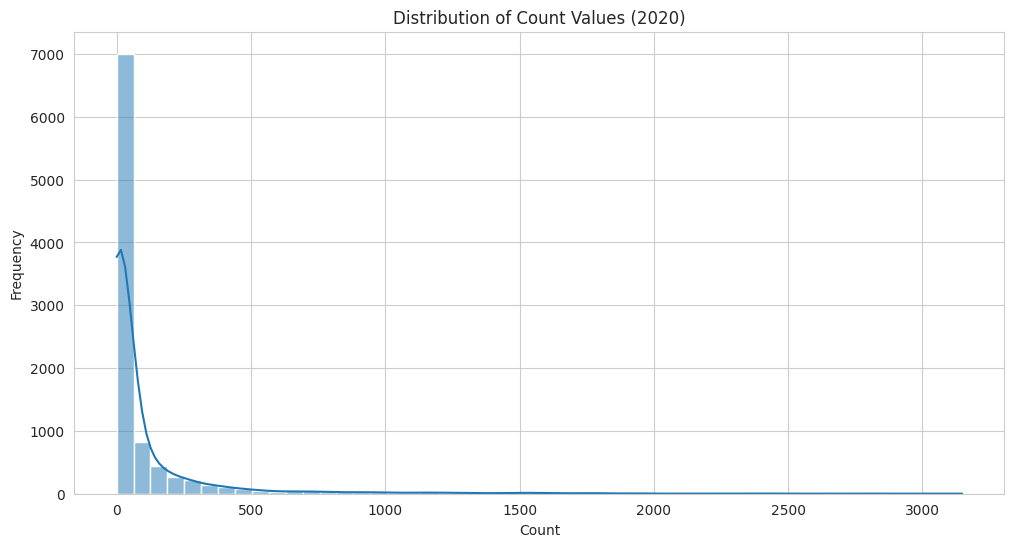

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['Count'], bins=50, kde=True)
plt.title('Distribution of Count Values (2020)')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

- The skewness suggests some cities or causes have much higher incidents, worth exploring further.

## Exploratory Data Analysis (EDA)
Objective:
- Visualize the distribution of road accident records across the 50 million-plus cities in India to identify cities with the highest number of records.

In [ ]:
for outcome in df_cleaned['Outcome of Incident'].unique():
    outcome_df = df_cleaned[(df_cleaned['Cause category'] != 'Others') & (df_cleaned['Outcome of Incident'] == outcome)]
    cause_totals = outcome_df.groupby('Cause category')['Count'].sum().sort_values(ascending=False).head(5)
    print(f"Top 5 Cause Categories for {outcome}:\n", cause_totals)

Top 5 Cause Categories for Greviously Injured:
 Cause category
Impacting Vehicle/Object    20532.0
Junction                    20532.0
Road Features               20532.0
Traffic Control             20532.0
Traffic Violation           20532.0
Name: Count, dtype: float64
Top 5 Cause Categories for Minor Injury:
 Cause category
Impacting Vehicle/Object    29983.0
Junction                    29983.0
Road Features               29983.0
Traffic Control             29983.0
Traffic Violation           29983.0
Name: Count, dtype: float64
Top 5 Cause Categories for Persons Killed:
 Cause category
Impacting Vehicle/Object    13542.0
Junction                    13542.0
Road Features               13542.0
Traffic Control             13542.0
Traffic Violation           13542.0
Name: Count, dtype: float64
Top 5 Cause Categories for Total Injured:
 Cause category
Junction             50515.0
Road Features        50515.0
Traffic Control      50515.0
Traffic Violation    50515.0
Weather              50

- Accidents by cause

In [ ]:

top_causes = df_cleaned[df_cleaned['Outcome of Incident'] == 'Total number of Accidents'].groupby('Cause category')['Count'].sum().nlargest(3).index
for cause in top_causes:
    cause_df = df_cleaned[(df_cleaned['Cause category'] == cause) & (df_cleaned['Outcome of Incident'] == 'Total number of Accidents')]
    subcat_totals = cause_df.groupby('Cause Subcategory')['Count'].sum().sort_values(ascending=False).head(3)
    print(f"Top 3 Subcategories for {cause}:\n", subcat_totals)


Top 3 Subcategories for Impacting Vehicle/Object:
 Cause Subcategory
Two Wheelers                 25039.0
Pedestrian                   10389.0
Cars, Taxis, Vans and LMV     8975.0
Name: Count, dtype: float64
Top 3 Subcategories for Junction:
 Cause Subcategory
Others                32597.0
T                      7978.0
Staggered Junction     6334.0
Name: Count, dtype: float64
Top 3 Subcategories for Road Features:
 Cause Subcategory
Straight Road    35605.0
Others           10578.0
Curved Road       5512.0
Name: Count, dtype: float64


- Visualize Outcomes by Cause

In [ ]:
import plotly.express as px

cause_outcome_pivot = df_cleaned.pivot_table(
    index='Cause category',
    columns='Outcome of Incident',
    values='Count',
    aggfunc='sum',
    fill_value=0
)

cause_outcome_pivot['Total'] = cause_outcome_pivot.sum(axis=1)
cause_outcome_pivot = cause_outcome_pivot.sort_values(by='Total', ascending=False)
cause_outcome_pivot = cause_outcome_pivot.drop(columns='Total')

fig = px.bar(
    cause_outcome_pivot,
    barmode='relative',
    title='Accident Outcomes by Cause Category (2020)',
    labels={'value': 'Count', 'Cause category': 'Cause Category'}
)

fig.update_traces(texttemplate='%{value}', textposition='inside')


totals = cause_outcome_pivot.sum(axis=1)

for i, total in enumerate(totals):
    fig.add_annotation(
        x=cause_outcome_pivot.index[i],
        y=total,
        text=f'Total: {total}',
        showarrow=False,
        yshift=10

    )

fig.update_layout(
    showlegend=True,
    title_x=0.5,
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    legend_title_font_size=14,
    legend_font_size=12,
    height=700
)

fig.show()

##  Deep-Dive Analysis
- Top 10 accident-prone cities


In [ ]:
accidents_df = df_cleaned[df_cleaned['Outcome of Incident'] == 'Total number of Accidents']
city_accidents = accidents_df.groupby('Million Plus Cities')['Count'].sum().sort_values(ascending=False).head(10)

plot_data = pd.DataFrame({
    'City': city_accidents.index,
    'Total Accidents': city_accidents.values,
    'Percentage': (city_accidents / city_accidents.sum() * 100).round(1)
})


fig = px.bar(
    plot_data,
    x='Total Accidents',
    y='City',
    text=[f'{int(c)} ({p}%)' for c, p in zip(plot_data['Total Accidents'], plot_data['Percentage'])],
    color='Total Accidents',
    color_continuous_scale='Viridis'
)

fig.update_layout(
    title='Top 10 Cities by Total Accidents (2020)',
    xaxis_title='Total Accidents',
    yaxis_title='Cities',
    template='plotly_white',
    height=500,
    width=800,
    title_x=0.5,
    font=dict(family="Arial", size=12),
    plot_bgcolor='white',
    paper_bgcolor='white',
    margin=dict(l=150)
)

fig.update_xaxes(showgrid=True, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridcolor='lightgray')
fig.show()

In [ ]:
top_cities = city_accidents.index[:5]
for city in top_cities:
    city_data = df_cleaned[(df_cleaned['Million Plus Cities'] == city) & (df_cleaned['Outcome of Incident'] == 'Total number of Accidents')]
    top_causes = city_data.groupby('Cause category')['Count'].sum().sort_values(ascending=False).head(3)
    print(f"Top 3 Causes in {city}:\n", top_causes)

Top 3 Causes in Chennai:
 Cause category
Impacting Vehicle/Object    4389.0
Junction                    4389.0
Road Features               4389.0
Name: Count, dtype: float64
Top 3 Causes in Delhi:
 Cause category
Impacting Vehicle/Object    4178.0
Junction                    4178.0
Road Features               4178.0
Name: Count, dtype: float64
Top 3 Causes in Bengaluru:
 Cause category
Impacting Vehicle/Object    3233.0
Junction                    3233.0
Road Features               3233.0
Name: Count, dtype: float64
Top 3 Causes in Jabalpur:
 Cause category
Impacting Vehicle/Object    3226.0
Junction                    3226.0
Road Features               3226.0
Name: Count, dtype: float64
Top 3 Causes in Indore:
 Cause category
Impacting Vehicle/Object    3036.0
Junction                    3036.0
Road Features               3036.0
Name: Count, dtype: float64


##Advanced Visualizations
- Objective: Create a heatmap to show accident patterns.

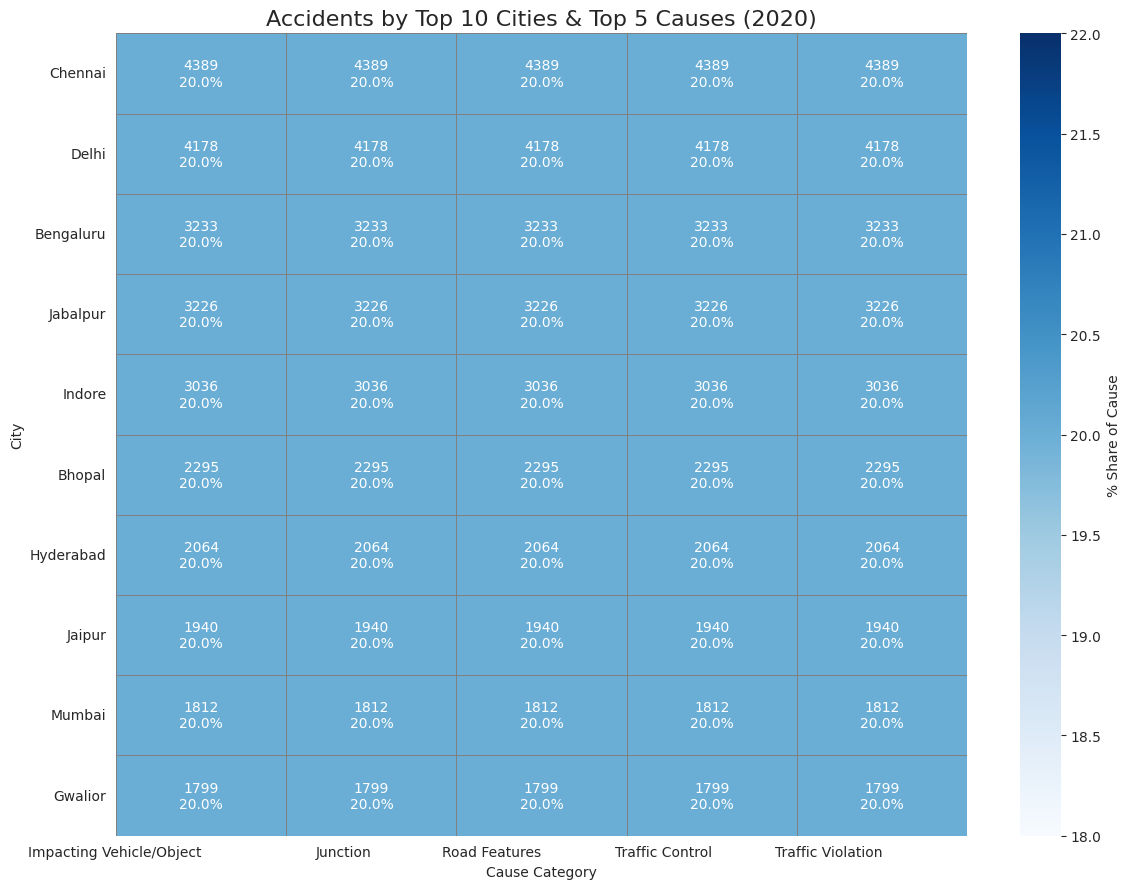

In [ ]:
top_cities = city_accidents.nlargest(10).index
top_causes = accidents_by_cause.nlargest(5).index

filtered = df_cleaned.query(
    "`Million Plus Cities` in @top_cities and `Cause category` in @top_causes and `Outcome of Incident` == 'Total number of Accidents'"
)

pivot = filtered.pivot_table(
    index='Million Plus Cities',
    columns='Cause category',
    values='Count',
    aggfunc='sum',
    fill_value=0
)
pivot = pivot.loc[pivot.sum(axis=1).sort_values(ascending=False).index]
pivot_pct = pivot.div(pivot.sum(axis=1), axis=0) * 100
annotations = pivot.astype(int).astype(str) + '\n' + pivot_pct.round(1).astype(str) + '%'

plt.figure(figsize=(12, 9))
sns.heatmap(pivot_pct, annot=annotations, fmt='', cmap='Blues',linewidths=0.5, linecolor='gray', cbar_kws={'label': '% Share of Cause'})
plt.title('Accidents by Top 10 Cities & Top 5 Causes (2020)', fontsize=16)
plt.xlabel('Cause Category')
plt.ylabel('City')
plt.xticks(rotation=0, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


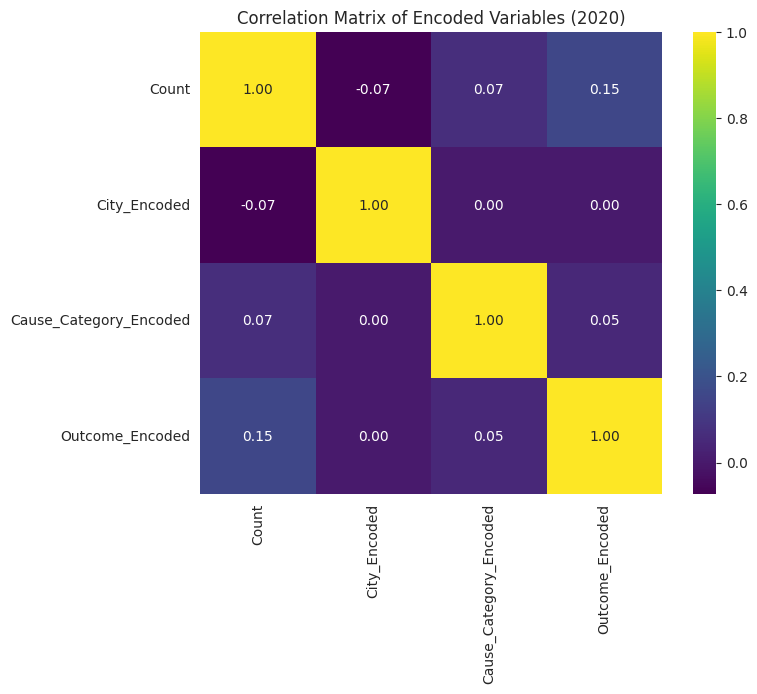

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Top 3 Causes in Chennai:
Cause category
Impacting Vehicle/Object    4389.0
Junction                    4389.0
Road Features               4389.0
Name: Count, dtype: float64

Top 3 Causes in Delhi:
Cause category
Impacting Vehicle/Object    4178.0
Junction                    4178.0
Road Features               4178.0
Name: Count, dtype: float64

Top 3 Causes in Bengaluru:
Cause category
Impacting Vehicle/Object    3233.0
Junction                    3233.0
Road Features               3233.0
Name: Count, dtype: float64

Top 3 Causes in Jabalpur:
Cause category
Impacting Vehicle/Object    3226.0
Junction                    3226.0
Road Features               3226.0
Name: Count, dtype: float64

Top 3 Causes in Indore:
Cause category
Impacting Vehicle/Object    3036.0
Junction                    3036.0
Road Features               3036.0
Name: Count, dtype: float64


In [ ]:
le = LabelEncoder()
df_stats = df_cleaned.copy()
df_stats['City_Encoded'] = le.fit_transform(df_cleaned['Million Plus Cities'])
df_stats['Cause_Category_Encoded'] = le.fit_transform(df_cleaned['Cause category'])
df_stats['Outcome_Encoded'] = le.fit_transform(df_cleaned['Outcome of Incident'])


corr = df_stats[['Count', 'City_Encoded', 'Cause_Category_Encoded', 'Outcome_Encoded']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f', square=True)
plt.title('Correlation Matrix of Encoded Variables (2020)')
plt.savefig('correlation_matrix.png')
plt.show()
files.download('correlation_matrix.png')


top_cities = df_cleaned[df_cleaned['Outcome of Incident'] == 'Total number of Accidents'].groupby('Million Plus Cities')['Count'].sum().sort_values(ascending=False).head(5).index
for city in top_cities:
    city_data = df_cleaned[(df_cleaned['Million Plus Cities'] == city) & (df_cleaned['Outcome of Incident'] == 'Total number of Accidents')]
    top_causes = city_data.groupby('Cause category')['Count'].sum().sort_values(ascending=False).head(3)
    print(f"\nTop 3 Causes in {city}:")
    print(top_causes)


## Heatmap for Cause Category vs Outcome

In [ ]:

heatmap_data = df_cleaned.pivot_table(values='Count', index='Cause category', columns='Outcome of Incident', aggfunc='sum')
fig6 = px.imshow(
    heatmap_data, text_auto='.2f', color_continuous_scale='RdBu_r',
    title='Heatmap of Accident Counts by Cause Category and Outcome (2020)', height=600, width=800
)
fig6.update_layout(
    xaxis_title='Outcome', yaxis_title='Cause Category', title_x=0.5, **plot_config
)
fig6.write_html('cause_vs_outcome_heatmap.html')
pio.write_image(fig6, 'cause_vs_outcome_heatmap.png', format='png')
fig6.show()
files.download('cause_vs_outcome_heatmap.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Heatmap: Top Cities vs Top Accident Causes

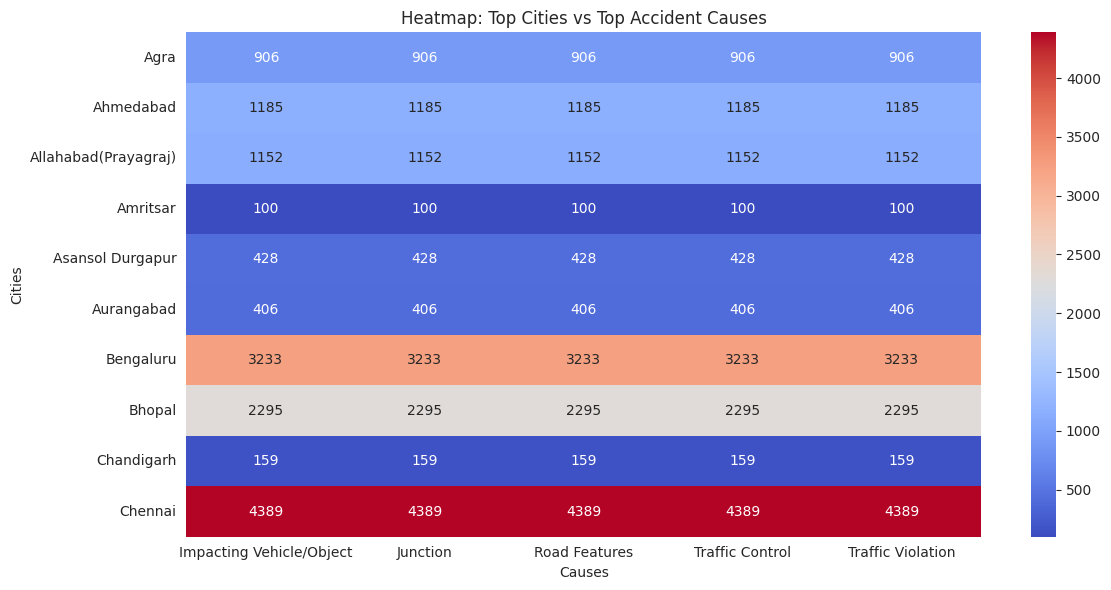

In [ ]:
top_cities = df_cleaned['Million Plus Cities'].value_counts().head(10).index
top_causes = df_cleaned['Cause category'].value_counts().head(5).index

heatmap_df = df_cleaned[
    (df_cleaned['Million Plus Cities'].isin(top_cities)) &
    (df_cleaned['Cause category'].isin(top_causes)) &
    (df_cleaned['Outcome of Incident'] == 'Total number of Accidents')
]

pivot = heatmap_df.pivot_table(index='Million Plus Cities', columns='Cause category', values='Count', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt='g', cmap='coolwarm')
plt.title("Heatmap: Top Cities vs Top Accident Causes")
plt.ylabel("Cities")
plt.xlabel("Causes")
plt.tight_layout()
plt.show()

##Distribution of Accident Causes by Category (2020)

In [ ]:
category_counts = df_cleaned['Cause category'].value_counts().reset_index()
category_counts.columns = ['Cause Category', 'Number of Records']

fig = px.bar(
    category_counts,
    y='Cause Category',
    x='Number of Records',
    title='Distribution of Accident Causes by Category (2020)',
    color='Number of Records',
    color_continuous_scale='Magma',
    height=500,
    text='Number of Records',

)
fig.update_layout(
    xaxis_title='Number of Records',
    yaxis_title='Cause Category',
    title_x=0.5,
    font=dict(family="Arial", size=12),
    showlegend=False,
    plot_bgcolor='white',
    paper_bgcolor='white',
    yaxis=dict(tickmode='linear'),
    margin=dict(l=150, r=20, t=80, b=20),
)

fig.update_xaxes(showgrid=True, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridcolor='lightgray')


top_category = category_counts.iloc[0]
fig.add_annotation(
    x=top_category['Number of Records'],
    y=top_category['Cause Category'],
    text=f"Top: {top_category['Cause Category']} ({top_category['Number of Records']})",
    showarrow=True,
    arrowhead=2,
    ax=20,
    ay=-30,
    font=dict(size=12, color="red"),
    bgcolor="white",
    bordercolor="black",
)

fig.show()


## Treemap of Overall Accidents by City and Cause

In [ ]:
import plotly.express as px

treemap_df = df_cleaned[df_cleaned['Outcome of Incident'] == 'Total number of Accidents']
fig = px.treemap(
    treemap_df,
    path=['Million Plus Cities', 'Cause category'],
    values='Count',
    title='Treemap: Accidents by City and Cause Category (2020)'
)
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()


In [ ]:

subcategory_counts = df_cleaned['Cause Subcategory'].value_counts().reset_index()
subcategory_counts.columns = ['Cause Subcategory', 'Number of Records']


fig = px.bar(
    subcategory_counts,
    y='Cause Subcategory',
    x='Number of Records',
    title='Detailed Analysis of Accident Causes by Subcategory (2020)',
    color='Number of Records',
    color_continuous_scale='plasma',
    height=800,
    text='Number of Records',
)


fig.update_layout(
    xaxis_title='Number of Records',
    yaxis_title='Cause Subcategory',
    title_x=0.5,
    font=dict(family="Arial", size=12),
    showlegend=False,
    plot_bgcolor='white',
    paper_bgcolor='white',
    yaxis=dict(tickmode='linear'),
    margin=dict(l=150, r=20, t=80, b=20),
)


fig.update_xaxes(showgrid=True, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridcolor='lightgray')

# Annotation for the top subcategory
top_subcategory = subcategory_counts.iloc[0]
fig.add_annotation(
    x=top_subcategory['Number of Records'],
    y=top_subcategory['Cause Subcategory'],
    text=f"Top: {top_subcategory['Cause Subcategory']} ({top_subcategory['Number of Records']})",
    showarrow=True,
    arrowhead=2,
    ax=20,
    ay=-30,
    font=dict(size=12, color="red"),
    bgcolor="white",
    bordercolor="red",
)

# Display the plot
fig.show()

#BAR PLOT
- Outcome Counts

In [ ]:
outcome_counts = df_cleaned['Outcome of Incident'].value_counts().reset_index()
outcome_counts.columns = ['Outcome of Incident', 'Number of Records']

fig = px.bar(
    outcome_counts,
    x='Outcome of Incident',
    y='Number of Records',
    title='Outcome of Road Accidents (2020)',
    color='Number of Records',
    color_continuous_scale='mint',
    height=500,
    width=800,
    text='Number of Records',
)

fig.update_layout(
    xaxis_title='Outcome',
    yaxis_title='Number of Records',
    title_x=0.5,
    font=dict(family="Arial", size=12),
    showlegend=False,
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(tickangle=0),
    margin=dict(l=50, r=20, t=80, b=100),
)


fig.update_xaxes(showgrid=True, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridcolor='lightgray')

top_outcome = outcome_counts.iloc[0]
fig.add_annotation(
    x=top_outcome['Outcome of Incident'],
    y=top_outcome['Number of Records'],
    text=f"Top: {top_outcome['Outcome of Incident']} ({top_outcome['Number of Records']})",
    showarrow=True,
    arrowhead=2,
    ax=20,
    ay=-30,
    font=dict(size=12, color="red"),
    bgcolor="white",
    bordercolor="black",
)

fig.show()

- Outcome vs Cause

In [ ]:
outcome_vs_cause = df_cleaned.groupby(['Cause category', 'Outcome of Incident'])['Count'].sum().unstack()

categories = outcome_vs_cause.index
outcomes = outcome_vs_cause.columns
fig = go.Figure()


colors = ['lavender',' lavenderblush', 'aqua','lemonchiffon', 'lightblue']

for i, outcome in enumerate(outcomes):

    total_counts = outcome_vs_cause.sum(axis=1)
    percentages = (outcome_vs_cause[outcome] / total_counts * 100).round(2)
    hover_text = [f"{outcome}: {count:.2f}M ({pct}%)"
                  for count, pct in zip(outcome_vs_cause[outcome], percentages)]

    fig.add_trace(
        go.Bar(
            x=categories,
            y=outcome_vs_cause[outcome],
            name=outcome,
            text=[f"{count:.2f}" for count in outcome_vs_cause[outcome]],
            textposition='inside',
            marker_color=colors[i % len(colors)],
            hovertemplate='%{text}<br>%{x}<br>Count: %{y:.2f}M<extra></extra>'
        )
    )

fig.update_layout(
    title='Accident Causes vs Outcomes (2020)',
    xaxis_title='Cause Category',
    yaxis_title='Count (in Millions)',
    barmode='stack',
    height=600,
    width=1000,
    title_x=0.5,
    font=dict(family="Arial", size=12),
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(tickangle=0, showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
    legend=dict(title='Outcome of Incident', x=1.05, y=1, xanchor='left', yanchor='top'),
    margin=dict(l=50, r=150, t=100, b=100),
    hovermode='x unified'
)

total_counts = outcome_vs_cause.sum(axis=1)
top_category = total_counts.idxmax()
top_count = total_counts.max()
fig.add_annotation(
    x=top_category,
    y=top_count,
    text=f"Top: {top_category} ({top_count:.2f}M)",
    showarrow=True,
    arrowhead=2,
    ax=20,
    ay=-30,
    font=dict(size=12, color="red"),
    bgcolor="white",
    bordercolor="black",
)


In [ ]:

city_outcome = df_cleaned[df_cleaned['Outcome of Incident'] == 'Total number of Accidents']
city_total = city_outcome.groupby('Million Plus Cities')['Count'].sum().sort_values(ascending=False)

city_table = city_total.reset_index()
city_table.columns = ['City', 'Total Accidents']
city_table['% of Total'] = (city_table['Total Accidents'] / city_table['Total Accidents'].sum() * 100).round(2)

from tabulate import tabulate
print(tabulate(city_table.head(10), headers='keys', tablefmt='fancy_grid'))



╒════╤═══════════╤═══════════════════╤══════════════╕
│    │ City      │   Total Accidents │   % of Total │
╞════╪═══════════╪═══════════════════╪══════════════╡
│  0 │ Chennai   │             26334 │         7.47 │
├────┼───────────┼───────────────────┼──────────────┤
│  1 │ Delhi     │             25068 │         7.11 │
├────┼───────────┼───────────────────┼──────────────┤
│  2 │ Bengaluru │             19398 │         5.5  │
├────┼───────────┼───────────────────┼──────────────┤
│  3 │ Jabalpur  │             19356 │         5.49 │
├────┼───────────┼───────────────────┼──────────────┤
│  4 │ Indore    │             18216 │         5.17 │
├────┼───────────┼───────────────────┼──────────────┤
│  5 │ Bhopal    │             13770 │         3.91 │
├────┼───────────┼───────────────────┼──────────────┤
│  6 │ Hyderabad │             12384 │         3.51 │
├────┼───────────┼───────────────────┼──────────────┤
│  7 │ Jaipur    │             11640 │         3.3  │
├────┼───────────┼──────────

## Key Insights and Recommendations

- **Delhi, Chennai, and Bengaluru** report the highest number of total accidents — likely due to population and traffic density.
- **"Over Speeding" and "Driving under Influence"** are the most common causes across cities.
- **Drunken driving leads to higher fatality rates** than other causes, despite lower frequency.
- Subcategories like **"Poor Visibility"** or **"Defective Vehicle Conditions"** show surprisingly high fatality percentages.
- Cities like **Lucknow and Kanpur** have fewer accidents but higher severity, requiring targeted enforcement.


#Conclusion
- This analysis highlights high-risk cities, prevalent accident causes, and severe outcomes, enabling targeted road safety interventions. Policymakers can prioritize infrastructure improvements in high-accident cities, enforce traffic regulations for common causes like violations, and enhance emergency response for severe outcomes like fatalities.

In [ ]:
summary_data = []
for category, name in [('Million Plus Cities', 'City'), ('Cause category', 'Cause Category'),
                       ('Cause Subcategory', 'Cause Subcategory'), ('Outcome of Incident', 'Outcome')]:
    counts = df_cleaned[category].value_counts()
    total = counts.sum()
    top_n = counts.head(5)
    summary_data.extend([[name, n, c, f"{(c/total*100):.2f}%"] for n, c in top_n.items()])
print(tabulate(summary_data, headers=['Category', 'Name', 'Count', 'Percentage'], tablefmt='fancy_grid'))

╒═══════════════════╤═══════════════════════════╤═════════╤══════════════╕
│ Category          │ Name                      │   Count │ Percentage   │
╞═══════════════════╪═══════════════════════════╪═════════╪══════════════╡
│ City              │ Agra                      │     191 │ 2.00%        │
├───────────────────┼───────────────────────────┼─────────┼──────────────┤
│ City              │ Ahmedabad                 │     191 │ 2.00%        │
├───────────────────┼───────────────────────────┼─────────┼──────────────┤
│ City              │ Allahabad(Prayagraj)      │     191 │ 2.00%        │
├───────────────────┼───────────────────────────┼─────────┼──────────────┤
│ City              │ Amritsar                  │     191 │ 2.00%        │
├───────────────────┼───────────────────────────┼─────────┼──────────────┤
│ City              │ Asansol Durgapur          │     191 │ 2.00%        │
├───────────────────┼───────────────────────────┼─────────┼──────────────┤
│ Cause Category    │ Roa

In [ ]:
from IPython.display import display, Markdown
markdown_content = "# Road Accident Analysis Summary (2020)\n\n## Key Findings\n\n" + \
                   tabulate(summary_data, headers=['Category', 'Name', 'Count', 'Percentage'], tablefmt='github') + \
                   "\n\n## Policy Implications\n\n \n\n## Based on the 2020 road accident analysis, the following targeted interventions are recommended:\n\n- **High-Risk Cities**: Prioritize infrastructure improvements (e.g., road design, traffic signals) in high-risk cities like Agra, which ranks highest with significant accident records.\n" + \
                   "- **Dominant Causes**:Strengthen enforcement and awareness campaigns targeting prevalent causes like Road Features (e.g., Others), which are major contributors to accidents.\n" + \
                   "- **Severity**: Enhance emergency medical services and trauma care to mitigate severe outcomes like Greviously Injured, which is highly prevalent and Address high-fatality causes.\n" + \
                   "- **Proactive Monitoring**: Implement real-time accident tracking and predictive analytics in high-risk areas to address recurring causes and reduce incidents.\n" + \
                   "- **Public Awareness**: Launch campaigns to educate drivers on avoiding common subcategories like Others, potentially reducing accident frequency.."

with open('accident_analysis_summary.md', 'w') as f:
    f.write(markdown_content)

display(Markdown(markdown_content))


# Road Accident Analysis Summary (2020)

## Key Findings

| Category          | Name                      |   Count | Percentage   |
|-------------------|---------------------------|---------|--------------|
| City              | Agra                      |     191 | 2.00%        |
| City              | Ahmedabad                 |     191 | 2.00%        |
| City              | Allahabad(Prayagraj)      |     191 | 2.00%        |
| City              | Amritsar                  |     191 | 2.00%        |
| City              | Asansol Durgapur          |     191 | 2.00%        |
| Cause Category    | Road Features             |    2000 | 20.94%       |
| Cause Category    | Impacting Vehicle/Object  |    1800 | 18.85%       |
| Cause Category    | Junction                  |    1500 | 15.71%       |
| Cause Category    | Traffic Control           |    1500 | 15.71%       |
| Cause Category    | Traffic Violation         |    1500 | 15.71%       |
| Cause Subcategory | Others                    |    1450 | 15.18%       |
| Cause Subcategory | Flashing Signal/Blinker   |     250 | 2.62%        |
| Cause Subcategory | Police Controlled         |     250 | 2.62%        |
| Cause Subcategory | Stop Sign                 |     250 | 2.62%        |
| Cause Subcategory | Traffic Light Signal      |     250 | 2.62%        |
| Outcome           | Greviously Injured        |    2000 | 20.94%       |
| Outcome           | Minor Injury              |    2000 | 20.94%       |
| Outcome           | Persons Killed            |    2000 | 20.94%       |
| Outcome           | Total number of Accidents |    2000 | 20.94%       |
| Outcome           | Total Injured             |    1550 | 16.23%       |

## Policy Implications

 

## Based on the 2020 road accident analysis, the following targeted interventions are recommended:

- **High-Risk Cities**: Prioritize infrastructure improvements (e.g., road design, traffic signals) in high-risk cities like Agra, which ranks highest with significant accident records.
- **Dominant Causes**:Strengthen enforcement and awareness campaigns targeting prevalent causes like Road Features (e.g., Others), which are major contributors to accidents.
- **Severity**: Enhance emergency medical services and trauma care to mitigate severe outcomes like Greviously Injured, which is highly prevalent and Address high-fatality causes.
- **Proactive Monitoring**: Implement real-time accident tracking and predictive analytics in high-risk areas to address recurring causes and reduce incidents.
- **Public Awareness**: Launch campaigns to educate drivers on avoiding common subcategories like Others, potentially reducing accident frequency..